<a href="https://colab.research.google.com/github/CalebJWeaver/SSAPython/blob/main/SSAGithub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# Determines how much of the total value will be represented in the final groupings.
# Common values are 95% (0.95) or 99.5% (0.995)
accuracy=0.995
# Experimentally determined. A good starting place would be 1/4 of length(Y), but thats is not guaranteed
L=100
# Import the data here. Have you "X" or time values as the first colum, and the "Y" values as the second.
# If you want to use another data format, you will need to change the read on values
url='[YOUR DATA HERE]'

values = pd.read_csv(url)

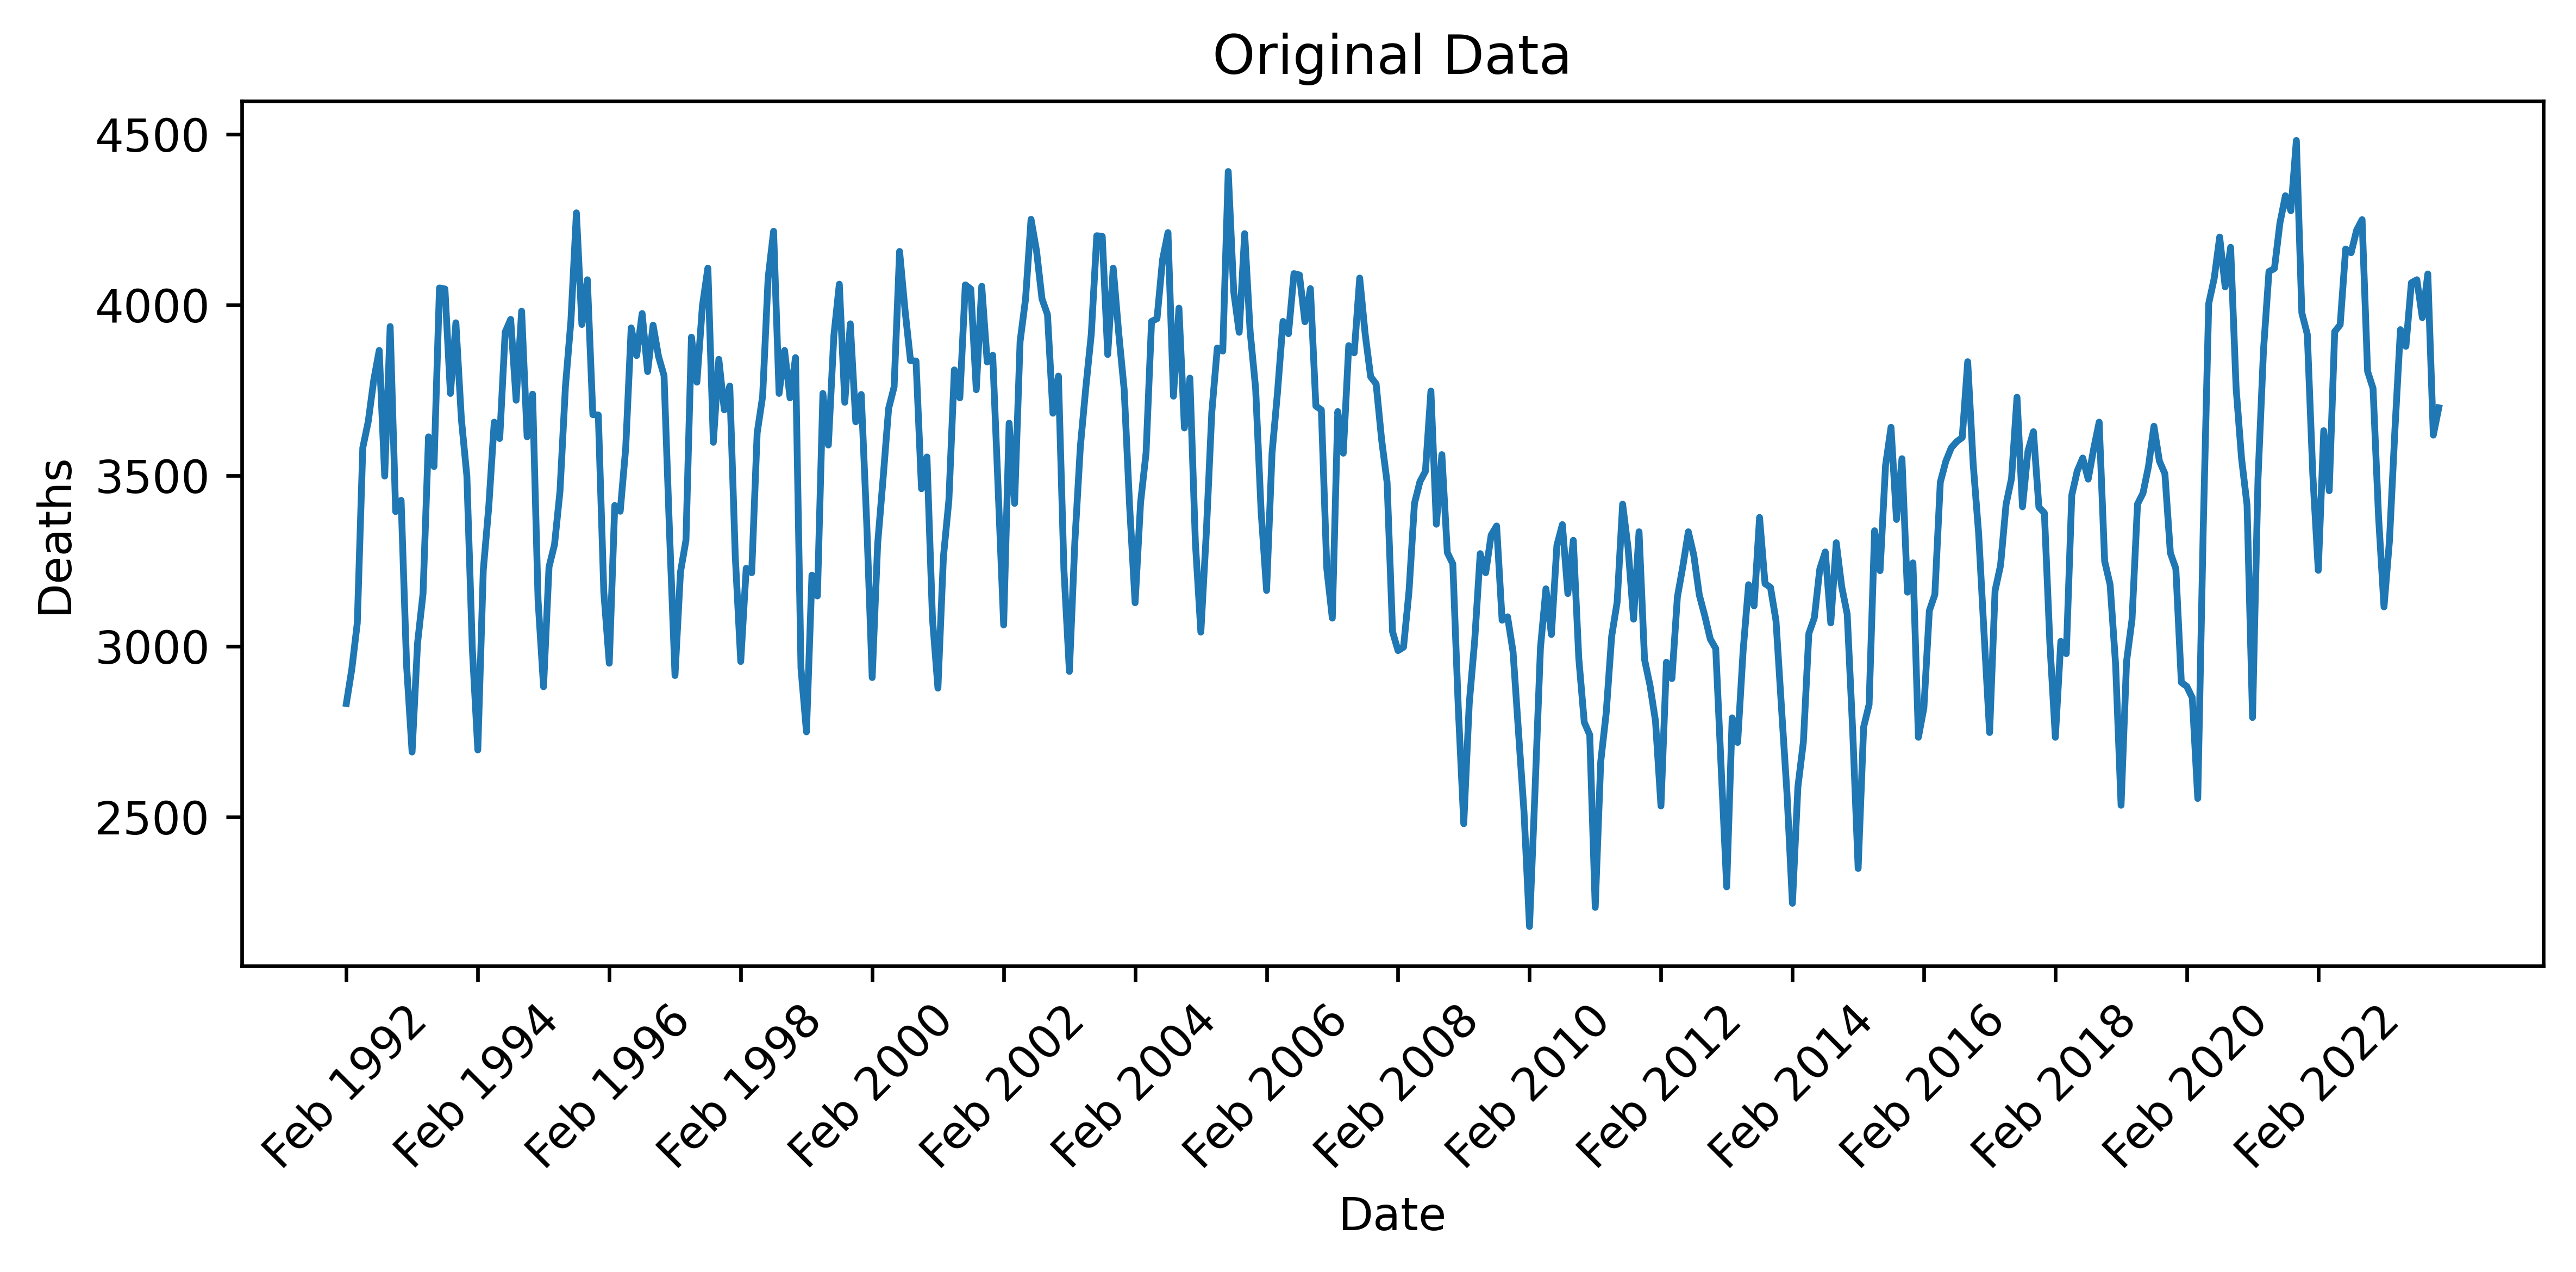

In [7]:
#setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import shapiro


#creates a matrix of all time points
T= values.iloc[:, 0].copy()

#creates a matrix with all "y" values
Y= values.iloc[:, 1].copy()
Y = pd.to_numeric(Y.astype(str).str.replace(',', ''), errors='coerce')

#plot
fig, ax = plt.subplots(figsize=(8, 4),dpi=600)
ax.plot(T, Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Original Data")


plt.xticks(np.arange(0, len(T), 24)) # Adjust the step size (e.g., 50) as needed
plt.xticks(rotation=45)
plt.tight_layout()

In [ ]:
K=len(Y)-L+1

#embedding
X = np.zeros(shape = (L, K))
for R in range(0,L):
  X[R,:]= Y[R:(R+K)]

#Calculates U, Sigma and V using the SVD function
U, S, V = np.linalg.svd(X)

Lambda values used= 5
percent accuracy [[[[[[], np.float64(0.0)], np.float64(0.9871745032962449)], np.float64(0.9907189702034185)], np.float64(0.9941505792631843)], np.float64(0.9967485871245393)]


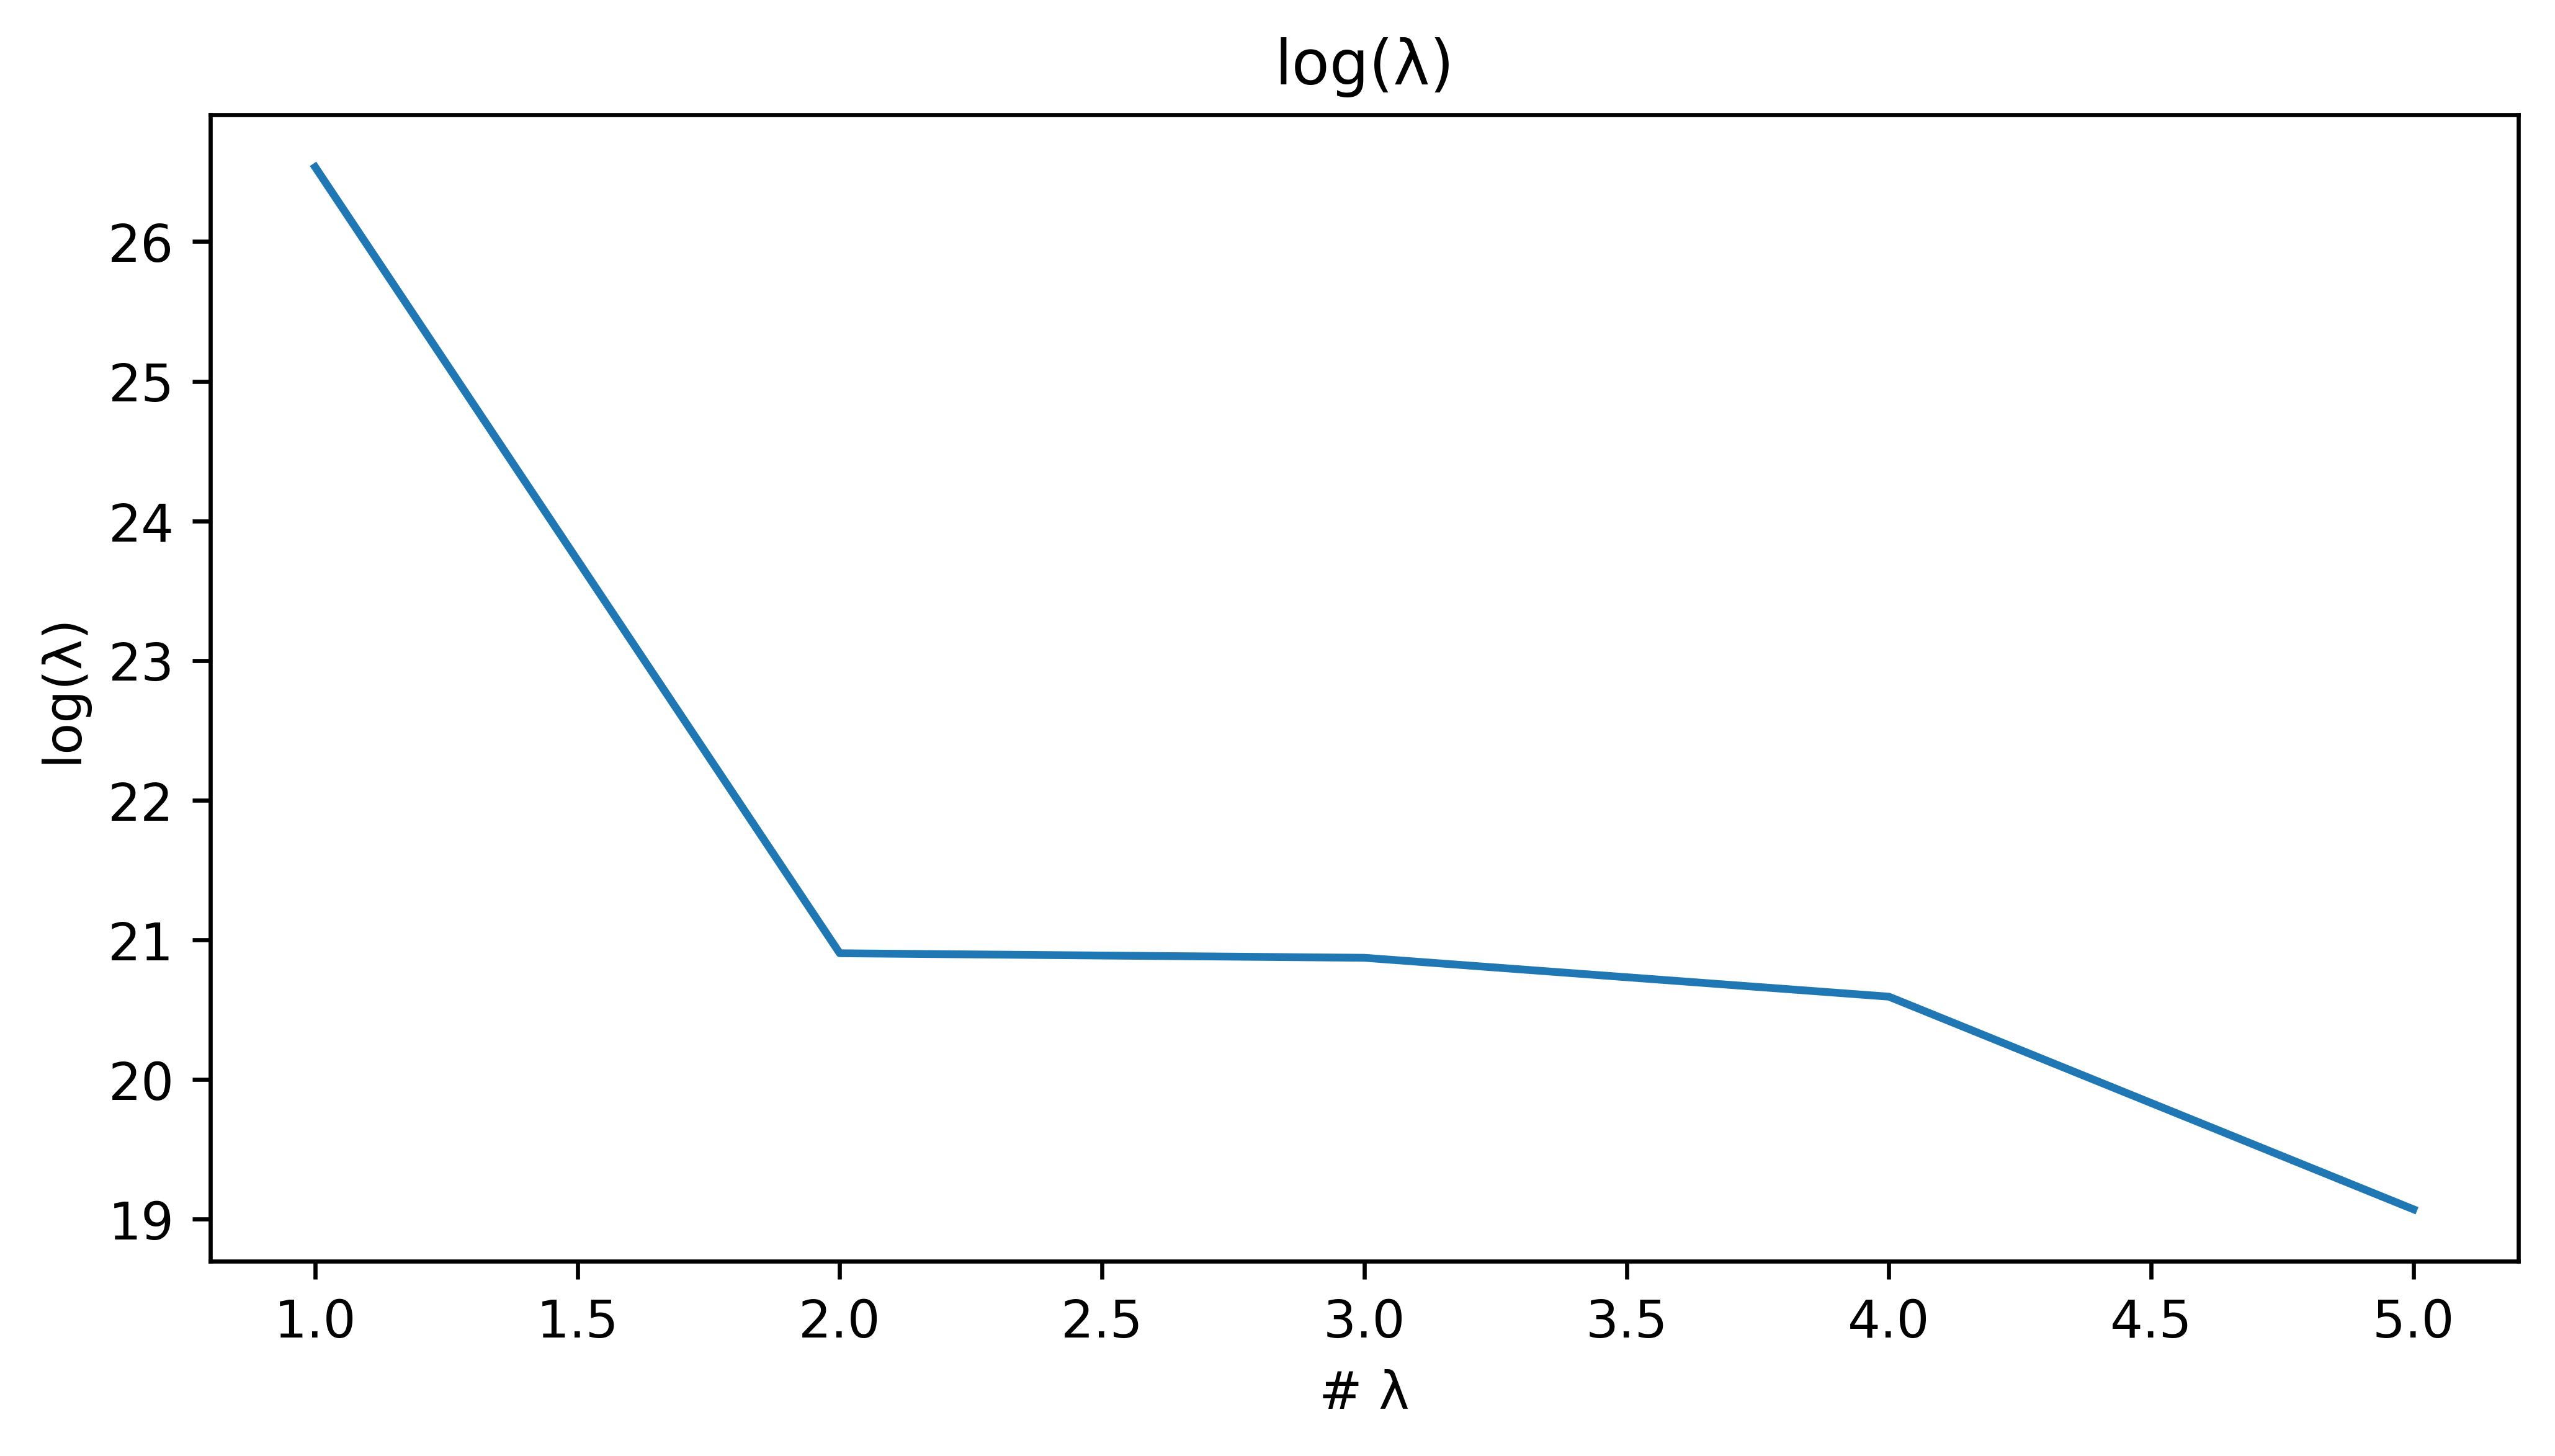

In [ ]:
Es=np.square(S)
Esum=0
j=0
per=[]
#Determines which eigenvalues will be used based on a user determinted accuracy
while Esum < accuracy :
    Esum=sum((Es[0:j]))/sum((Es))
    per=[per,Esum]
    j=j+1

print('Lambda values =',j)
print('percent accuracy',per)

Lg=Es[0:j].copy()
Xg=range(1,len(Lg)+1)

#plot of log values of each lambda used
fig, ax = plt.subplots(figsize=(8, 4),dpi=600)
plt.plot(Xg,np.log(Lg))
plt.title('log(\u03BB)')
plt.xlabel('# \u03BB')
plt.ylabel('log(\u03BB)')
del Lg
del Xg
del Es



In [ ]:
x=[]
for i in range(0,j+1):
  t1=U[:,i].reshape(L,1)
  t2=V[i,:].reshape(1,K)
  temp= S[i]*np.matmul(t1,t2)
  temp=np.flip(temp,1)
  x.append(temp)

del t1
del t2
del temp

In [ ]:
#Grouping process. This is done manually in this program, based on the values of lambda above.
#Remember that Python starts the index at 0

'''
ex:
group1=x[0];
print('group1=x1')
group2=x[1]+x[2]+x[3]+x[4]
print('group2=x2+x3+x4+x5')
groups=[group1,group2]
'''


gs=len(groups)

group1=x1
group2=x2+x3+x4+x5


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

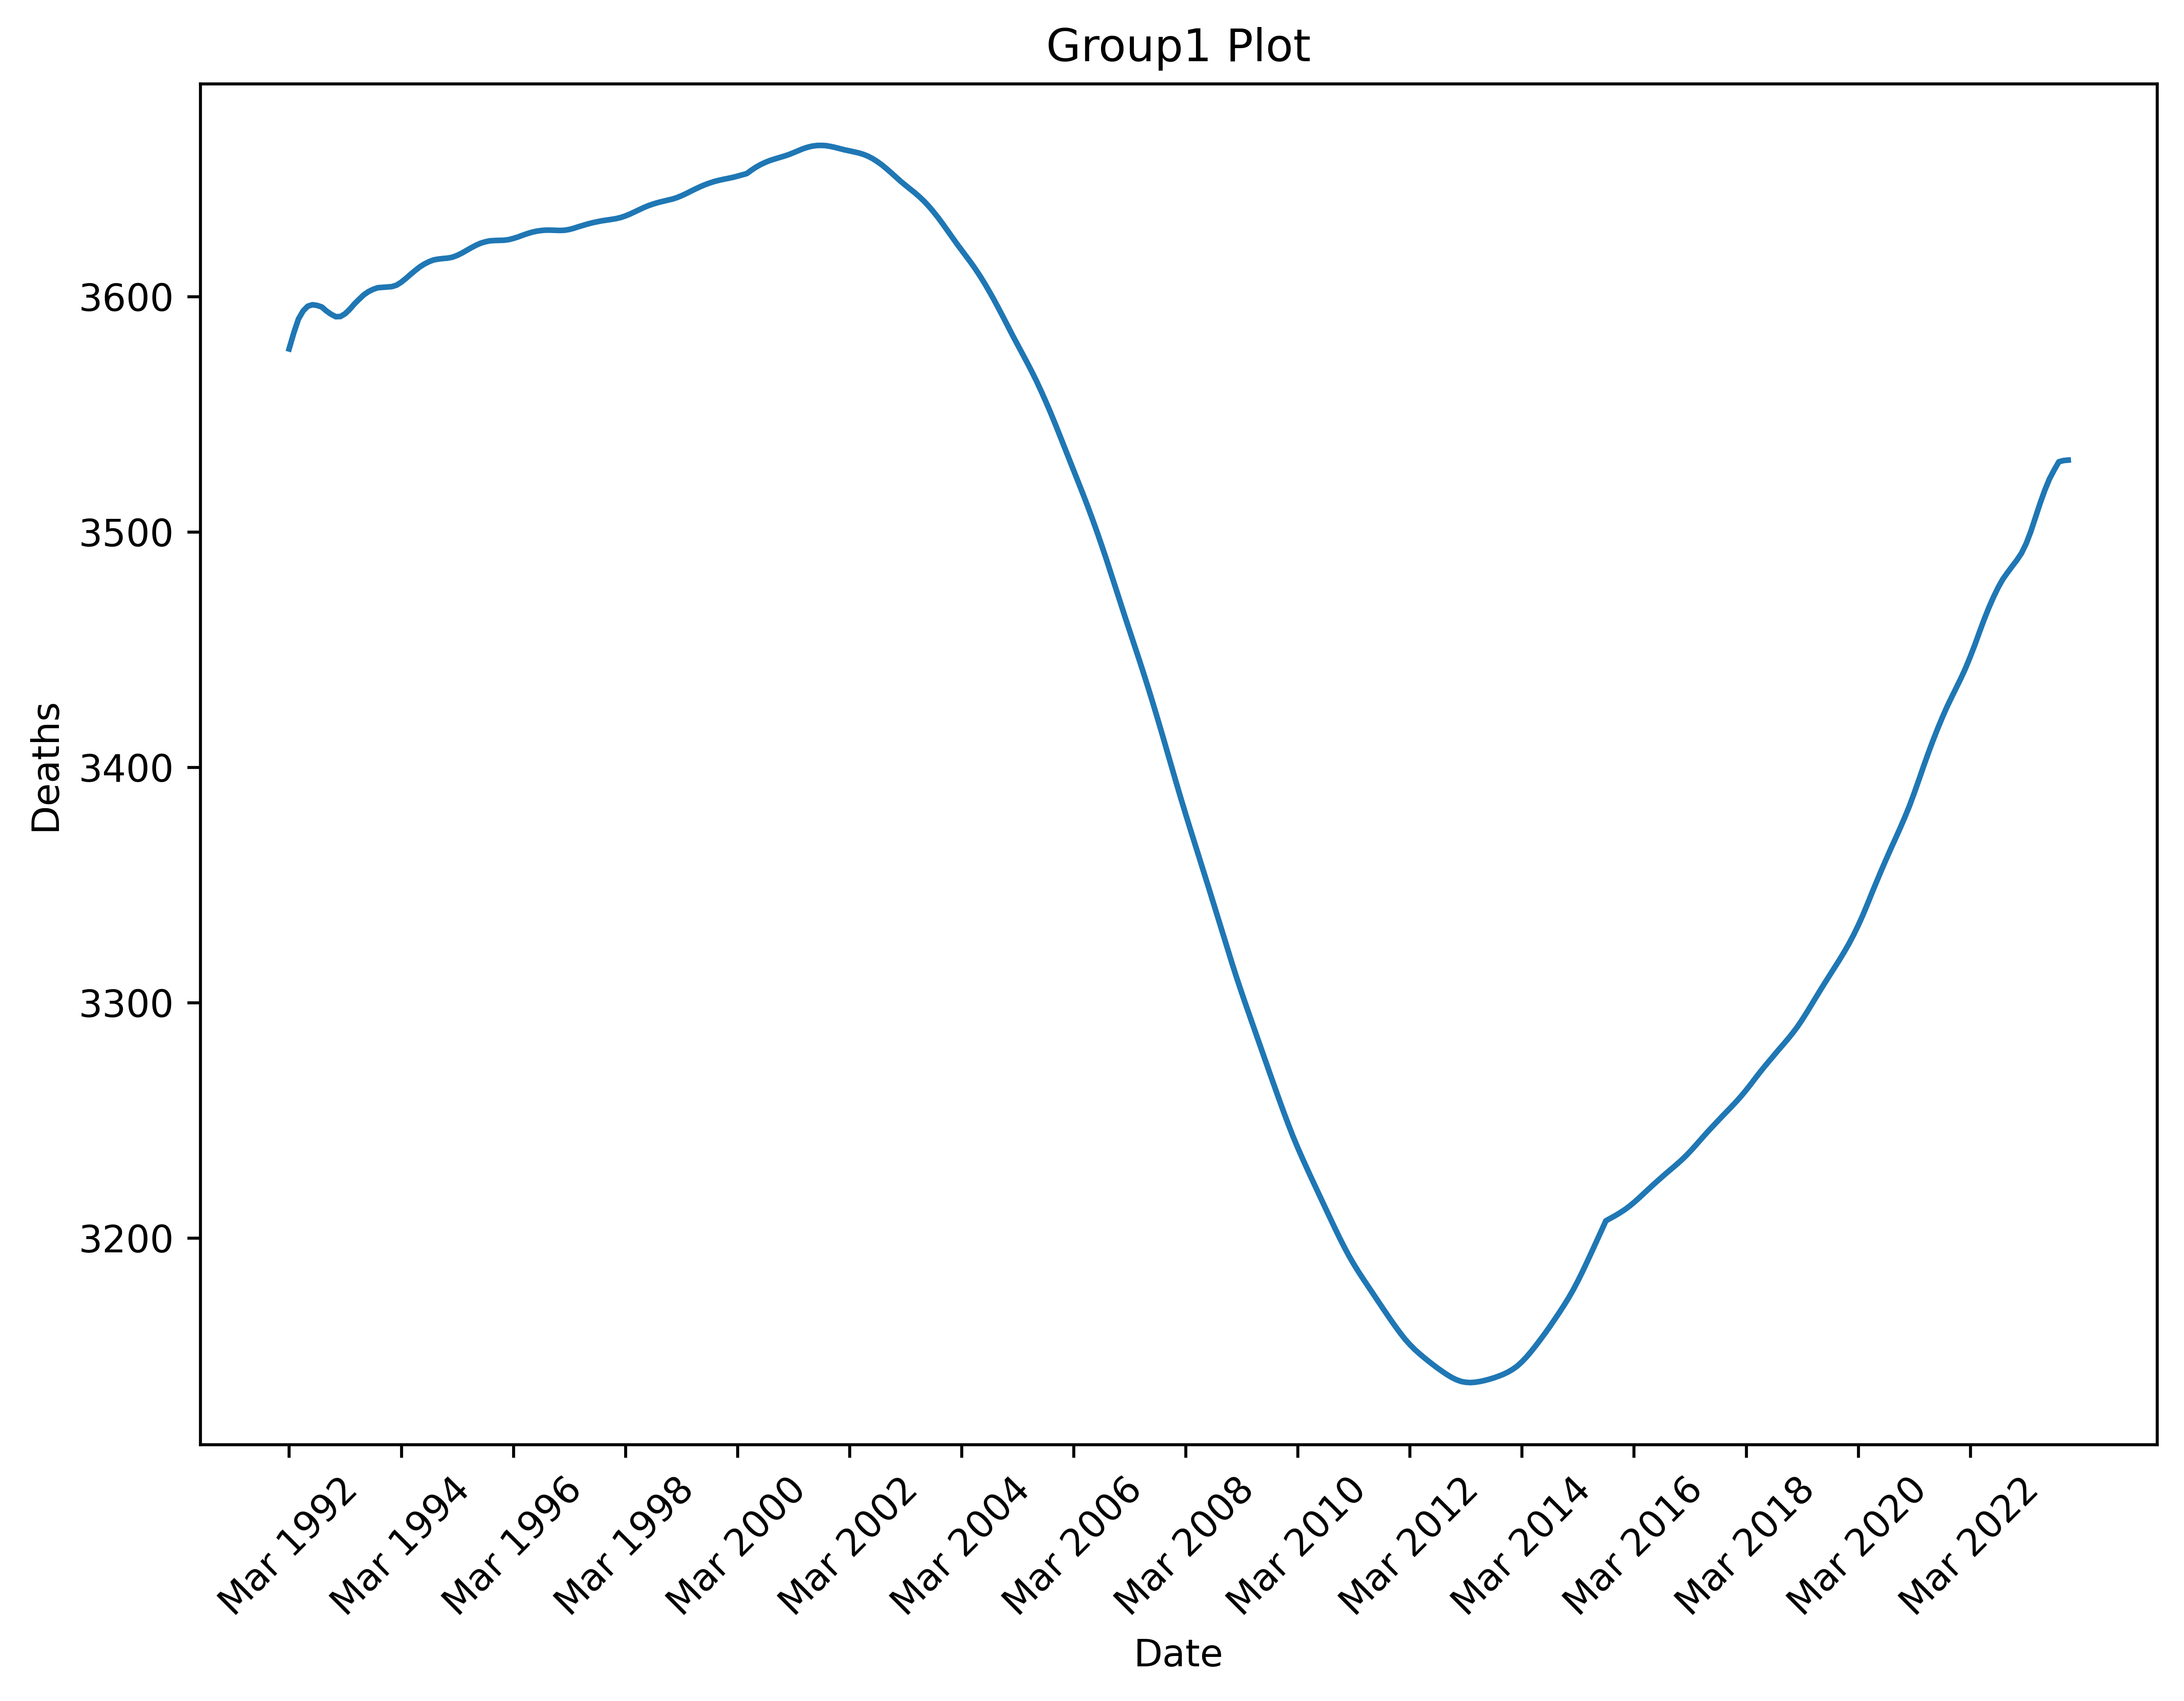

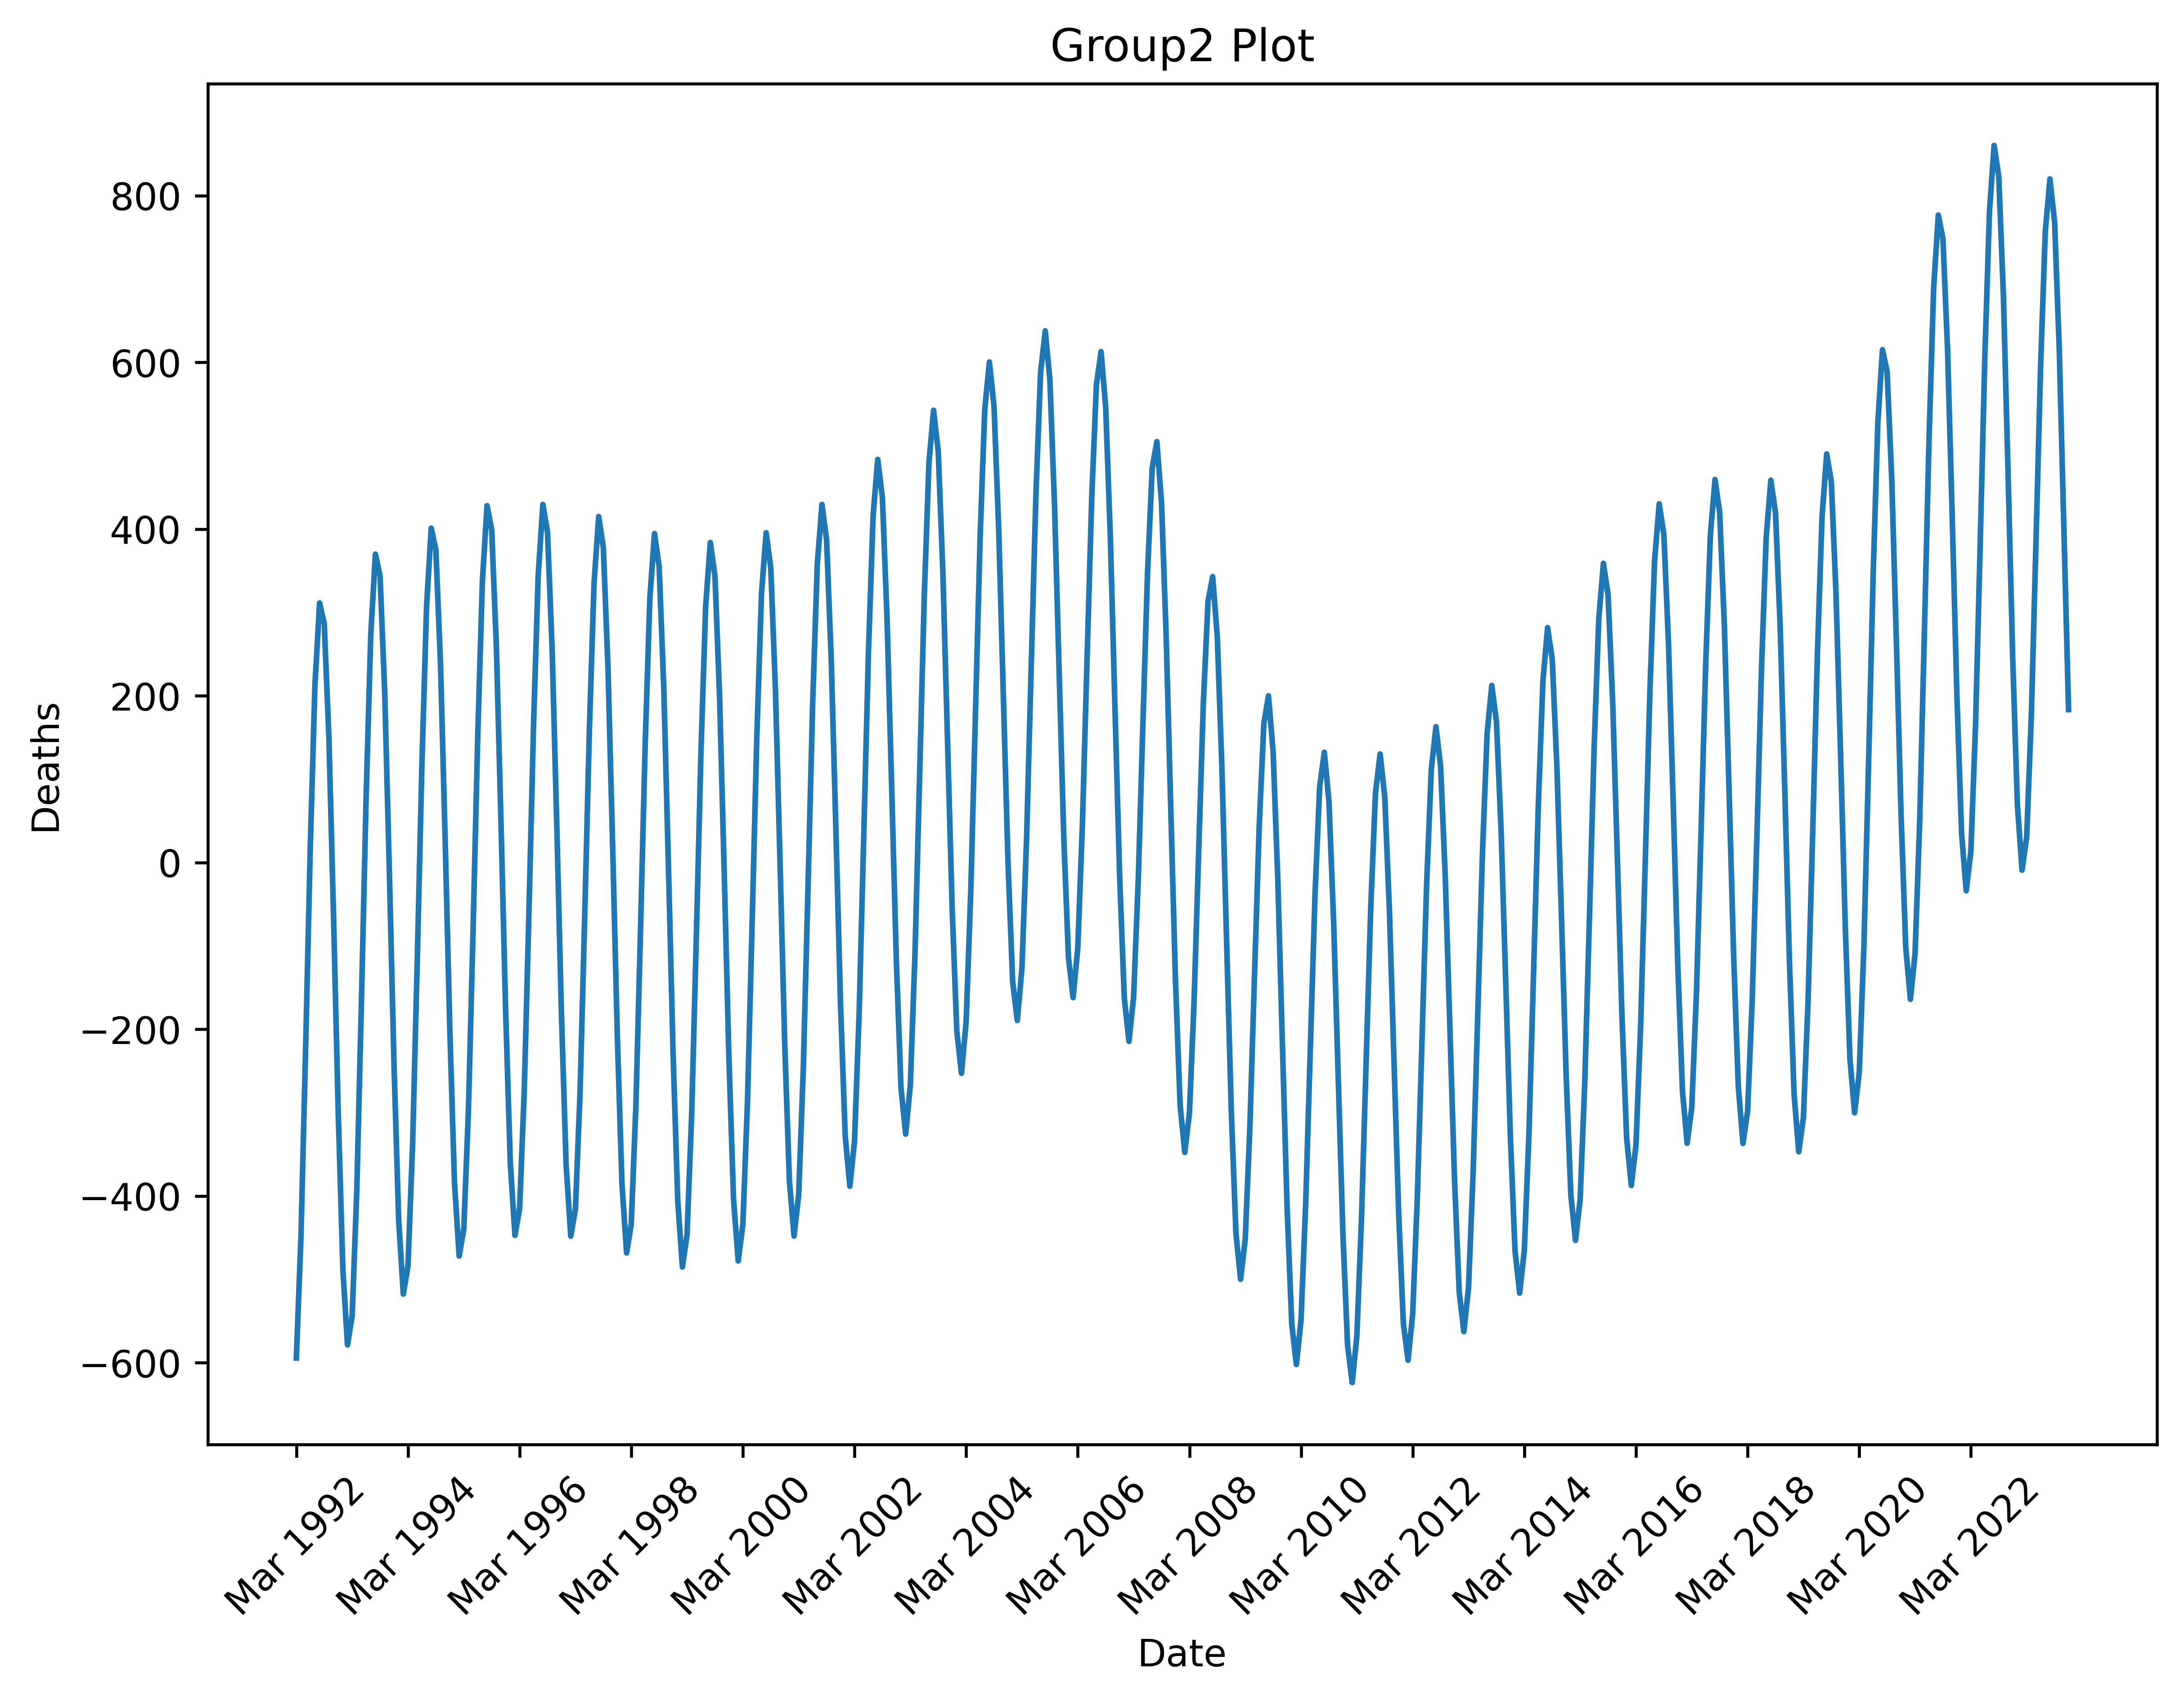

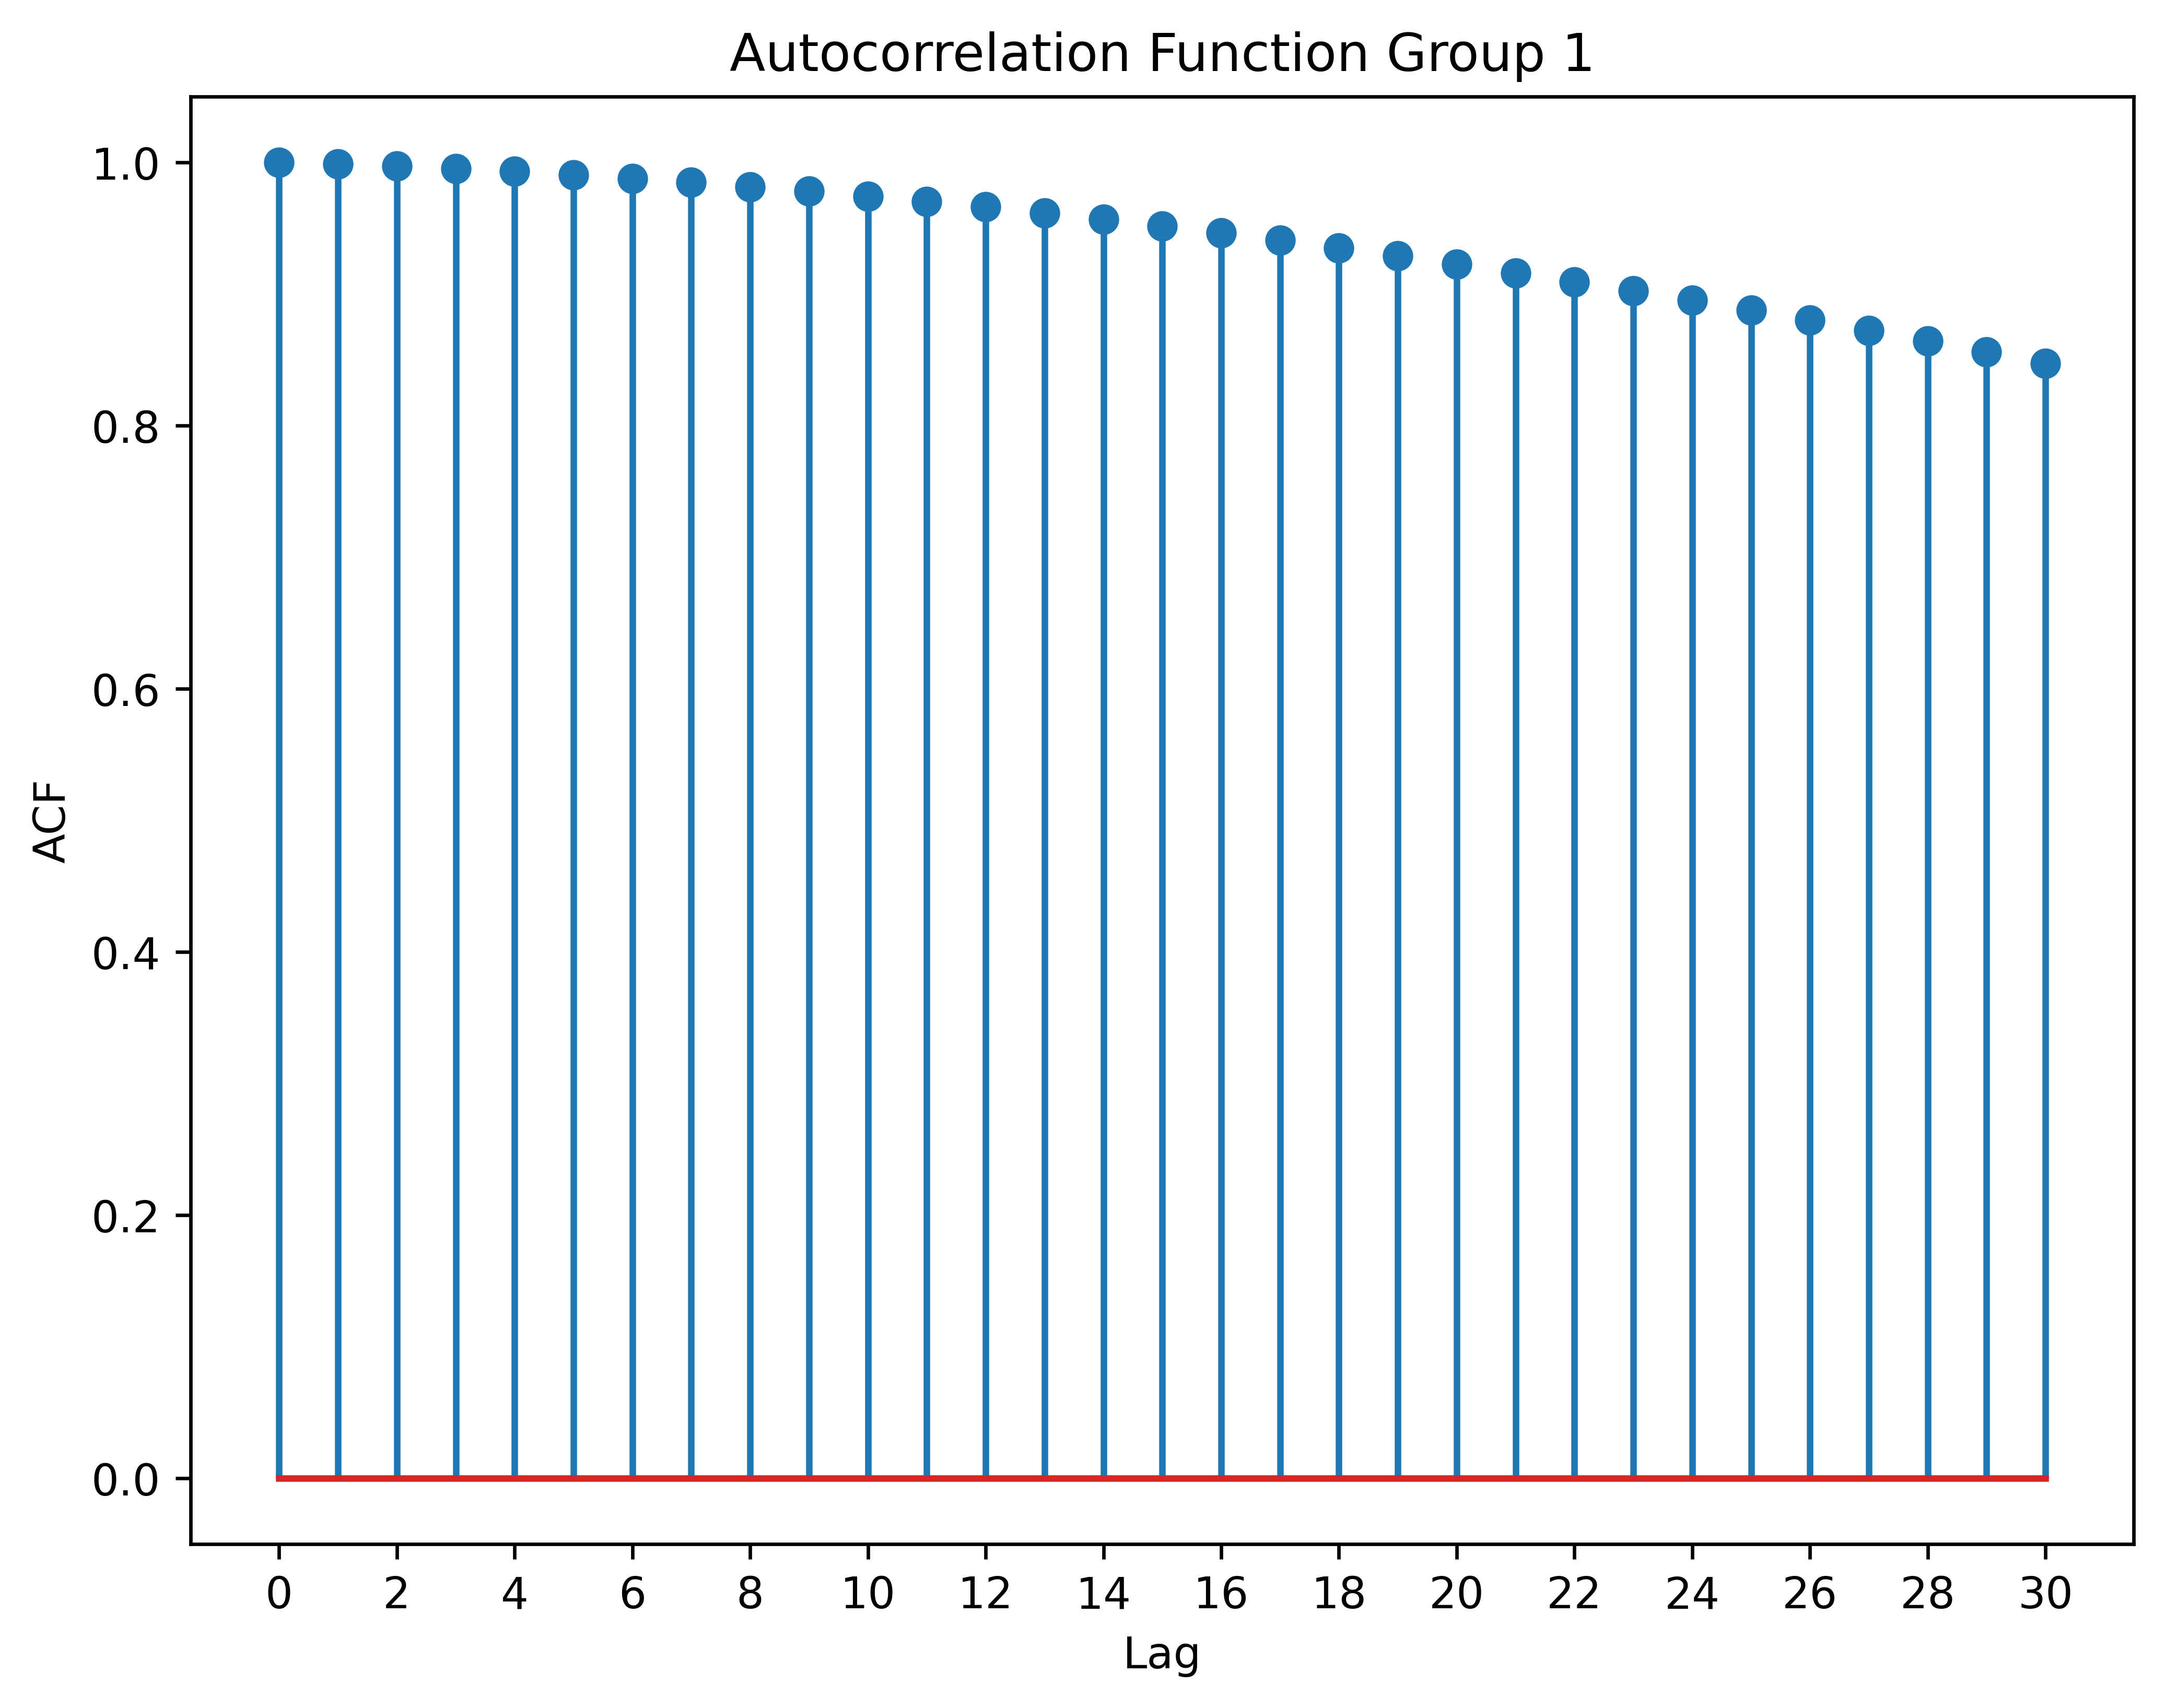

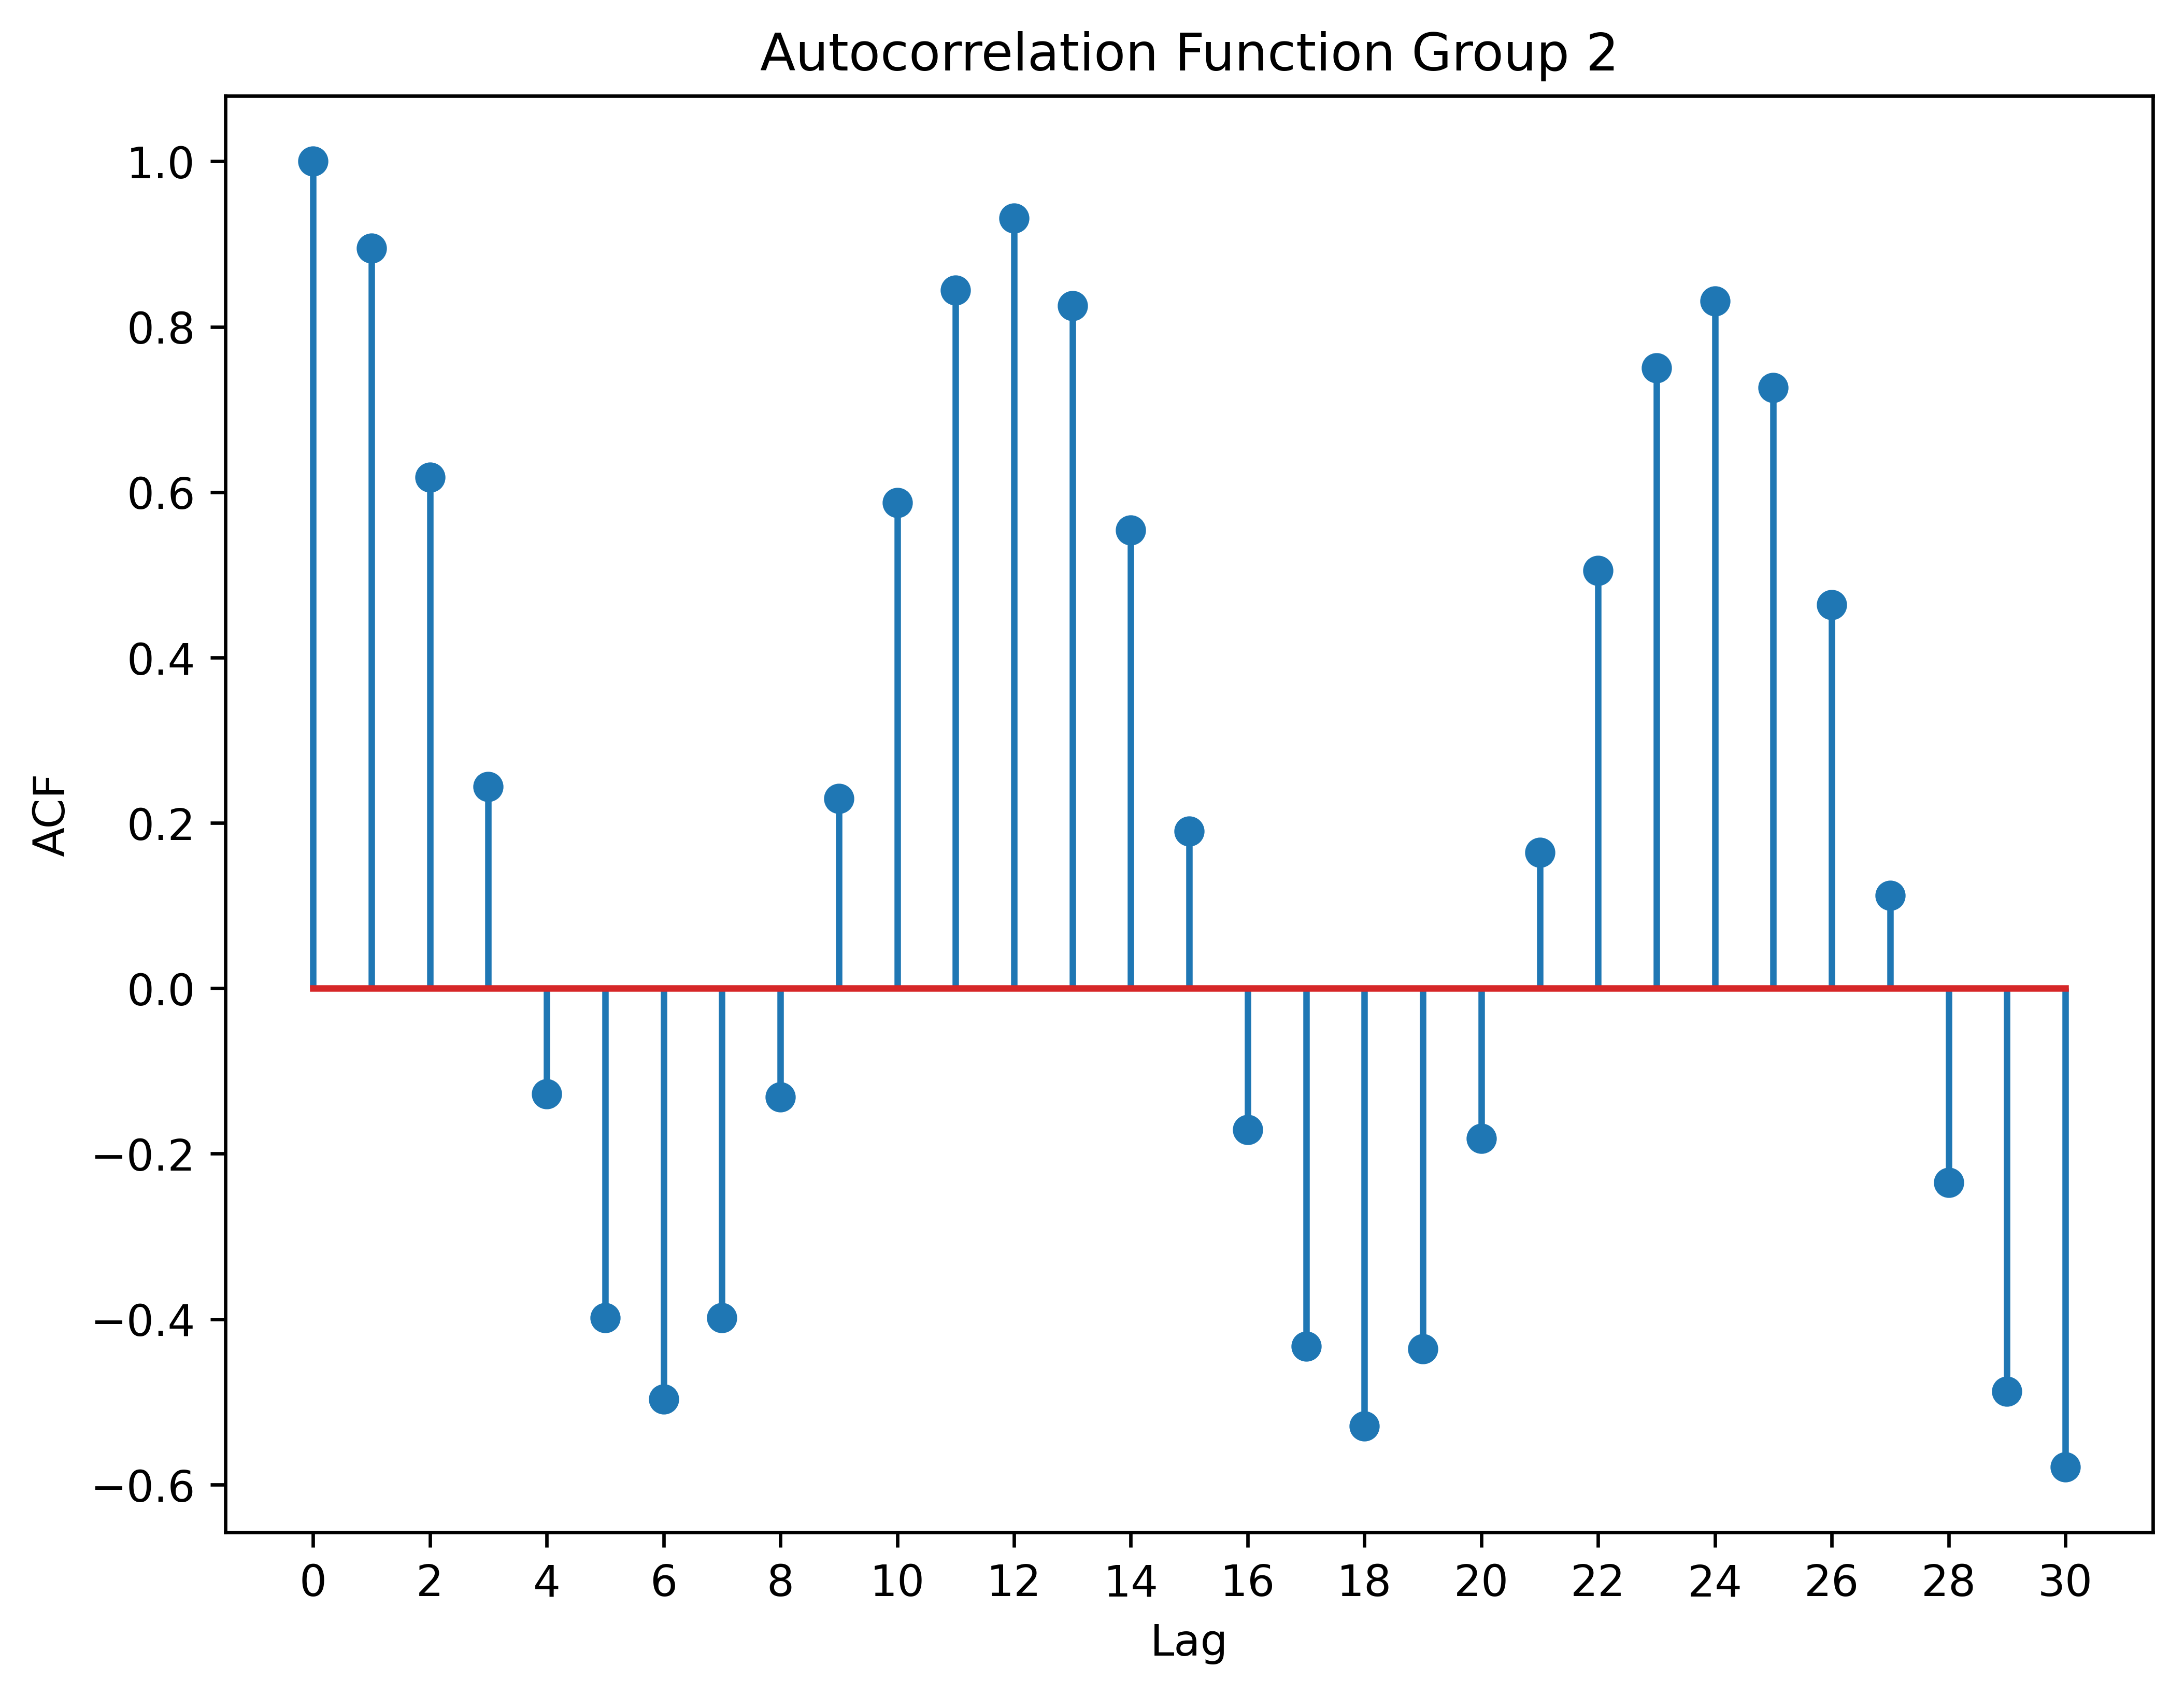

In [ ]:
#diagonal averaging
Yval=np.zeros(shape=(1,len(Y)-1))
for k in range(0,gs):
  Ys = []
  curr=groups[k]
  [row,col]=curr.shape
  p=1-row
  while p < col-1:
     Ys.append(np.mean(np.diag(curr,p)))
     p=p+1
  Ys=np.flip(Ys)
  Yval=np.vstack((Yval,Ys))

#figures
  plt.figure(k)
  fig, ax = plt.subplots(figsize=(8, 6),dpi=600)
  ax.plot(T[1:len(T)], Ys)
  # Select fewer ticks for the x-axis for better readability
  plt.xticks(np.arange(0, len(T), 24)) # Adjust the step size (e.g., 50) as needed
  plt.xticks(rotation=45)
  plt.tight_layout()

  title_string='Group'+str(k+1)+' Plot'
  plt.title(title_string)
  plt.xlabel('Date')
  plt.ylabel('Deaths')


  # Compute ACF and 95% confidence intervals
  acf_vals, confint = acf(Ys, nlags=30, alpha=0.05)

  # %% Plot the ACF
  # Create stem plot
  lags = np.arange(len(acf_vals))
  plt.figure(k+gs)
  fig, ax = plt.subplots(figsize=(8, 6),dpi=600)
  plt.stem(lags, acf_vals)
  plt.xticks(np.arange(0, len(lags), 2))
  plt.xlabel('Lag')
  plt.ylabel('ACF')
  plt.title('Autocorrelation Function Group '+str(k+1))
del k
del lags
del acf_vals
del confint
del curr
del row
del col
del p
del Ys
del title_string

In [ ]:
error=Y[1:len(Y)]-np.sum(Yval,axis=0)
plt.figure(1)
fig, ax = plt.subplots(figsize=(8, 6),dpi=600)
ax.plot(T[1:len(T)], error)
# Select fewer ticks for the x-axis for better readability
plt.xticks(np.arange(0, len(T), 24)) # Adjust the step size (e.g., 50) as needed
plt.xticks(rotation=45)
plt.tight_layout()
plt.xlabel('T');
plt.ylabel('Y');
plt.title("Error");

print('mean error=',np.mean(error))

plt.figure(2)
#Compute ACF and 95% confidence intervals
acf_vals, confint = acf(error, nlags=30, alpha=0.05)
# %% Plot the ACF
# Create stem plot
lags = np.arange(len(acf_vals))
plt.figure(k+gs)
fig, ax = plt.subplots(figsize=(8, 6),dpi=600)
plt.stem(lags, acf_vals)
plt.xticks(np.arange(0, len(lags), 2))
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.title('Autocorrelation Function of Error')

del lags
del acf_vals
del confint
del error

In [ ]:
sm=np.sum(Yval,axis=0)
plt.figure
plt.plot(sm)
plt.xlabel('T');
plt.ylabel('Y');
plt.title("Groups added together");

In [ ]:
plt.figure()
fig, ax = plt.subplots(figsize=(8, 4),dpi=600)
ax.plot(T[1:len(T)],sm,"o", label="Estimate")
plt.plot(T[1:len(T)],Y[1:len(Y)], label="Original")
plt.xticks(np.arange(0, len(T), 24)) # Adjust the step size (e.g., 50) as needed
plt.xticks(rotation=45)
plt.tight_layout()
plt.xlabel('T');
plt.ylabel('Y');
title_string='Original and Estimate, L= '+str(L)
plt.title(title_string)
plt.legend()

In [ ]:
#Two checks to see if the error is truely error. A normal distribution would be expected for the error

plt.figure()
fig, ax = plt.subplots(figsize=(8, 6),dpi=600)
plt.hist(error)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Histogram of Error')
print(shapiro(error))
